In [1]:
'''
导入各种包
其中：
graphviz为可视化图形软件
调用gplearn遗传中的回归分析模块
'''
import numpy as np
import pandas as pd
import io
import graphviz
import gplearn
from gplearn.genetic import SymbolicRegressor

import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

plt.style.use('seaborn-notebook')

导入四个文件，年份均从1989年到2018年，每年按照月份分为四个季度。

In [2]:
'''
国民生产总值平减指数 (GNP Deflator) 以2012年为基准年份
数据来源：https://fred.stlouisfed.org/series/GNPDEF
'''

df_GNPDEF = pd.read_csv('GNPDEF.csv', parse_dates=['DATE'], index_col=['DATE'])
df_GNPDEF.columns = ['VAL']
#将百分比转化为小数
df_GNPDEF.VAL = df_GNPDEF.VAL/100

In [3]:
'''
验证是否导入成功
查看数据类型以及部分数据格式
'''
display(df_GNPDEF.dtypes)
display(df_GNPDEF.head())

VAL    float64
dtype: object

,VAL
DATE,
1989-01-01,0.338958
1989-04-01,0.339498
1989-07-01,0.340807
1989-10-01,0.342137
1990-01-01,0.343529


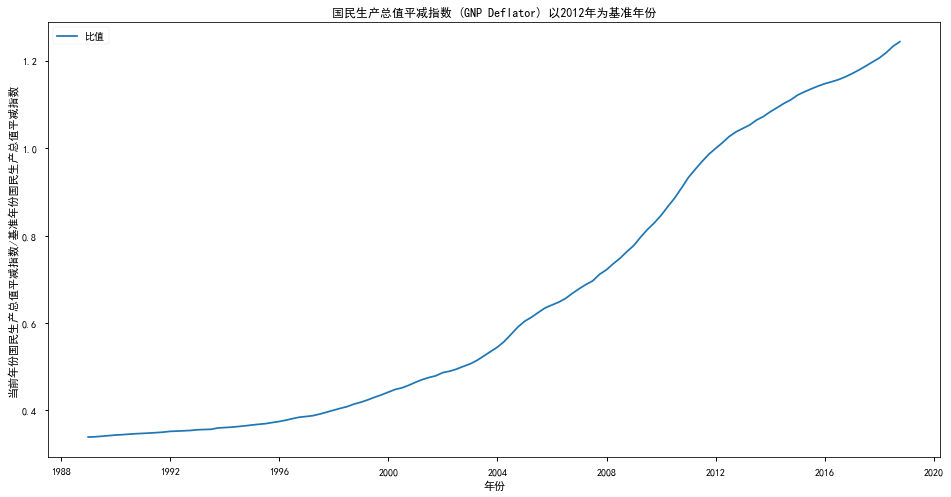

In [4]:
#制图的规格大小
plt.figure(figsize=(16, 8))

#标签显示解决中文问题
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

#图表的相关性说明
plt.title('国民生产总值平减指数 (GNP Deflator) 以2012年为基准年份')
plt.xlabel('年份')
plt.ylabel('当前年份国民生产总值平减指数/基准年份国民生产总值平减指数')

#调整标签的名称以及位置
plt.plot(df_GNPDEF.index, df_GNPDEF.VAL,label='比值')
plt.legend(loc = 'upper left')

#展示
plt.show()

In [5]:
'''
国民生产总值 (GNP),  以2012年为基准年份
数据来源： https://fred.stlouisfed.org/series/GNPC96
'''
df_GNP = pd.read_csv('GNP.csv', parse_dates=['DATE'], index_col=['DATE'])
df_GNP.columns = ['VAL']
#将百分比转化为小数
#df_GNP.VAL = df_GNP.VAL/100

In [6]:
'''
验证是否导入成功
查看数据类型以及部分数据格式
'''
display(df_GNP.dtypes)
display(df_GNP.head())

VAL    float64
dtype: object

,VAL
DATE,
1989-01-01,45.71211
1989-04-01,46.73765
1989-07-01,46.79040
1989-10-01,46.94016
1990-01-01,47.97725


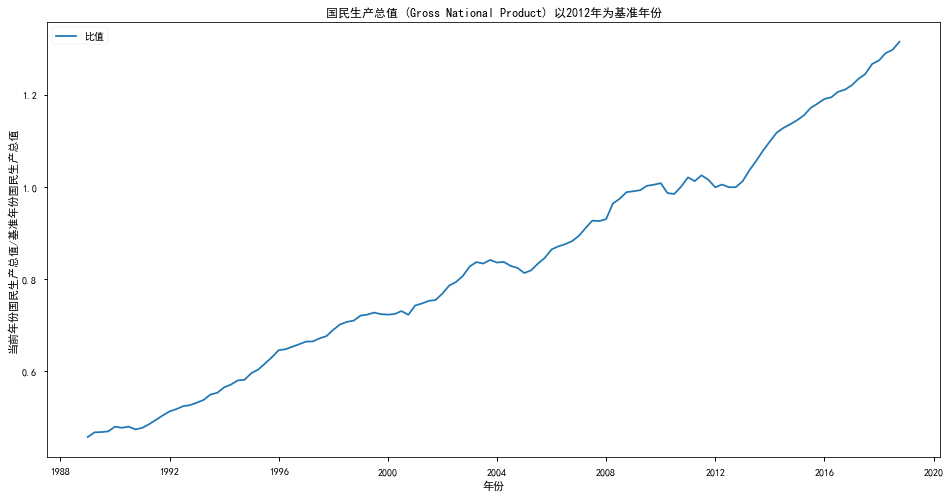

In [7]:
#制图的规格大小
plt.figure(figsize=(16, 8))

#图表的相关性说明
plt.title('国民生产总值 (Gross National Product) 以2012年为基准年份')
plt.xlabel('年份')
plt.ylabel('当前年份国民生产总值/基准年份国民生产总值')

#调整标签的名称以及位置
plt.plot(df_GNP.index, df_GNP.VAL/100,label='比值')
plt.legend(loc = 'upper left')

#展示
plt.show()

In [8]:
'''
广义货币供应量 (M2),  以2012年为基准年份
数据来源： https://fred.stlouisfed.org/series/MYAGM2USM052S
'''
df_M2 = pd.read_csv('M2.csv', parse_dates=['DATE'], index_col=['DATE'])
df_M2.columns = ['VAL']
#将百分比转化为小数
#df_M2.VAL = df_M2.VAL/100

In [9]:
'''
验证是否导入成功
查看数据类型以及部分数据格式
'''
display(df_M2.dtypes)
display(df_M2.head())

VAL    float64
dtype: object

,VAL
DATE,
1989-01-01,16.19650
1989-04-01,16.43846
1989-07-01,16.66166
1989-10-01,16.71981
1990-01-01,16.80797


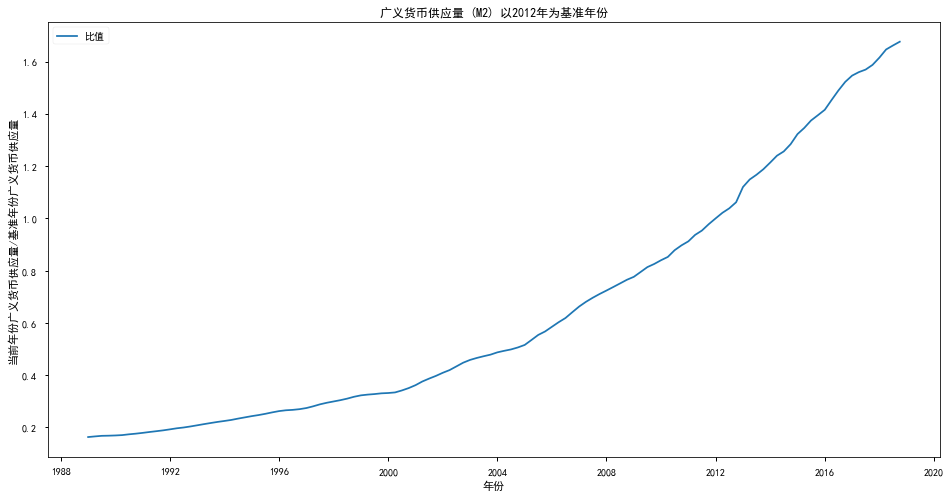

In [10]:
#制图的规格大小
plt.figure(figsize=(16, 8))

#图表的相关性说明
plt.title('广义货币供应量 (M2) 以2012年为基准年份')
plt.xlabel('年份')
plt.ylabel('当前年份广义货币供应量/基准年份广义货币供应量')

#调整标签的名称以及位置
plt.plot(df_M2.index, df_M2.VAL/100,label='比值')
plt.legend(loc = 'upper left')

#展示
plt.show()

In [11]:
'''
三个月国库券利率 (3-Month US Treasury bills),是市场利率变动情况的集中反映
数据来源： https://fred.stlouisfed.org/series/DTB3
'''

df_TB = pd.read_csv('3MTB.csv', parse_dates=['DATE'], index_col=['DATE'])
df_TB.columns = ['VAL']

In [12]:
'''
验证是否导入成功
查看数据类型以及部分数据格式
'''
display(df_TB.dtypes)
display(df_TB.head())

VAL    float64
dtype: object

,VAL
DATE,
1989-01-01,2.773333
1989-04-01,3.000000
1989-07-01,3.540000
1989-10-01,4.230000
1990-01-01,3.873333


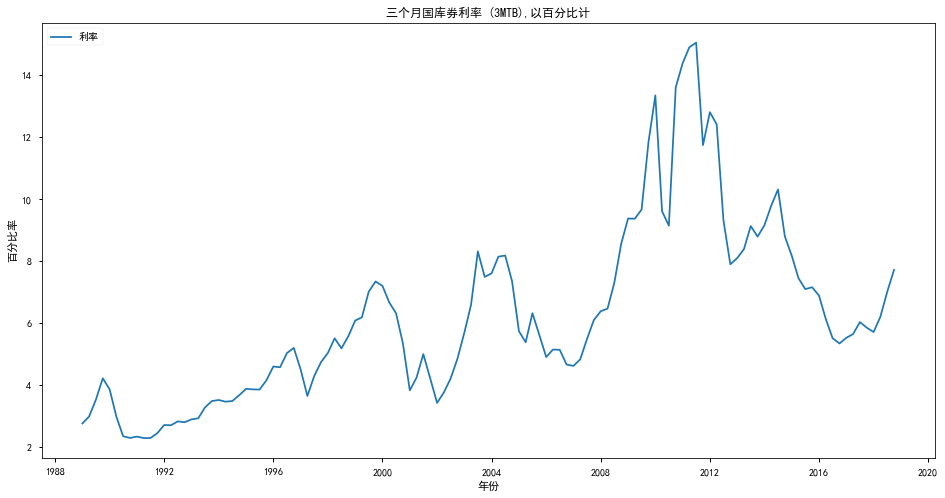

In [13]:
#制图的规格大小
plt.figure(figsize=(16, 8))

#图表的相关性说明
plt.title('三个月国库券利率 (3MTB),以百分比计')
plt.xlabel('年份')
plt.ylabel('百分比率')

#调整标签的名称以及位置
plt.plot(df_TB.index, df_TB.VAL,label = '利率')
plt.legend(loc = 'upper left')

#展示
plt.show()

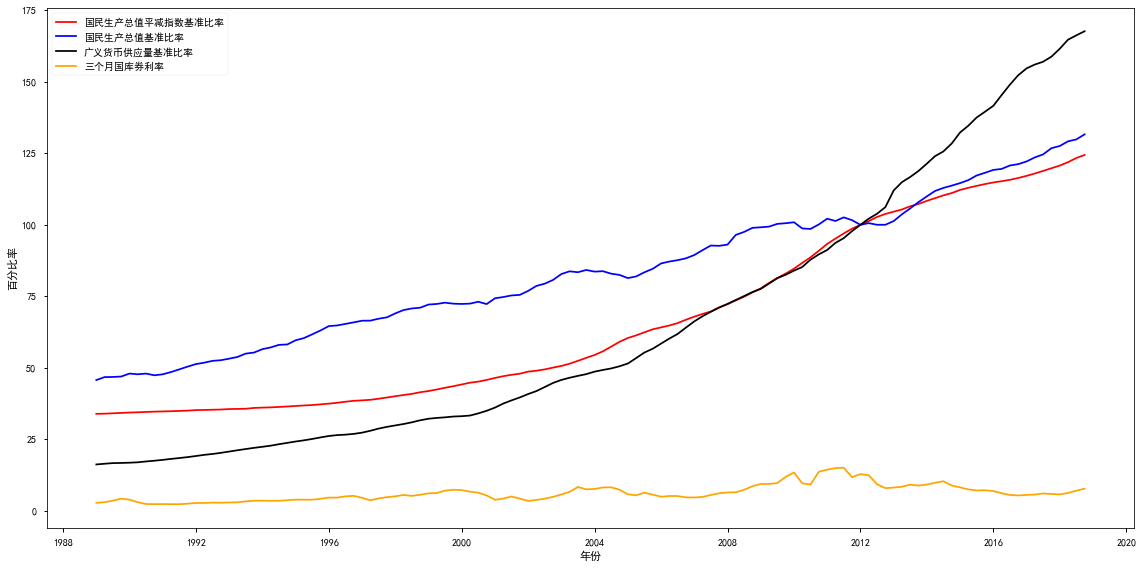

In [14]:
#多条线段
fig, ax1 = plt.subplots(figsize = (16, 8))

#定义x，y轴
ax1.set_xlabel('年份')
ax1.set_ylabel('百分比率', color='black')

#红线为国民生产总值平减指数
color = 'red'
line1, = ax1.plot(df_GNPDEF.index, df_GNPDEF.VAL*100, color=color, label = '国民生产总值平减指数')

#蓝线为国民生产总值基准比率
color = 'blue'
line2, = ax1.plot(df_GNPDEF.index, df_GNP.VAL, color=color, label = '国民生产总值基准比率')

#黑线为广义货币供应量基准比率
color = 'black'
line3, = ax1.plot(df_GNPDEF.index, df_M2.VAL, color=color, label = '广义货币供应量基准比率')

#黄线为三个月国库券利率基准比率
color = 'orange'
line4, = ax1.plot(df_GNPDEF.index, df_TB.VAL, color=color, label = '三个月国库券利率基准比率')


#图片自动调整函数
fig.tight_layout()  

#线段名字定义以及展示
plt.legend(handles = [line1, line2, line3, line4], labels = ['国民生产总值平减指数基准比率', '国民生产总值基准比率', '广义货币供应量基准比率', '三个月国库券利率'], loc = 'upper left')
plt.show()

modeling

In [15]:
# 三个自变量组成X，另一个为y
# .T将矩阵转置
X = np.array([df['VAL'] for df in [df_GNP, df_M2, df_TB]]).T
y = df_GNPDEF.VAL.values

#X为二维数组，shape[0]为行数，shape[1]为列数 120为30*4 列数分别表述数据类型
#y为一维数组，为平减指数
print(X.shape, y.shape)
#查看样例
display(X[:5, :])
display(y[:5])

(120, 3) (120,)


array([[45.71211   , 16.1965    ,  2.77333333],
       [46.73765   , 16.43846   ,  3.        ],
       [46.7904    , 16.66166   ,  3.54      ],
       [46.94016   , 16.71981   ,  4.23      ],
       [47.97725   , 16.80797   ,  3.87333333]])

array([0.3389577, 0.339498 , 0.3408071, 0.342137 , 0.3435292])

In [16]:
#论文作者在论文中推荐的数值 P101
split_index = 80

#训练样本（前20年的数据，80个样本）
X_train = X[:split_index, :]
y_train = y[:split_index]

#测试样本（后10年的数据，40个样本）
X_test = X[split_index:, :]
y_test = y[split_index:]

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    17.95 2.823065034833232e+60       13 2.0987012399535363 2.0987012399535363      0.00s


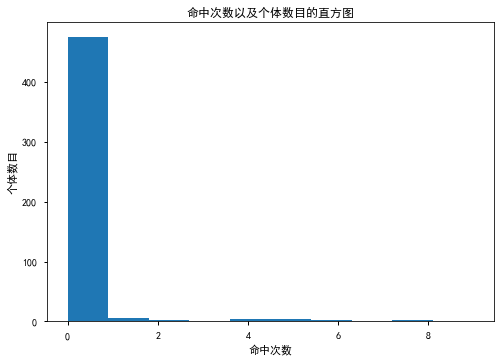

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'sub', 'mul', 'div', 'log', <gplearn.functions._Function object at 0x0000027493FE6848>),
         generations=1, init_depth=(2, 6), init_method='half and half',
         introspecting_function=<function introspect at 0x0000027493FD7318>,
         max_samples=0.8,
         metric=<gplearn.fitness._Fitness object at 0x0000027493FE6888>,
         n_jobs=1, p_crossover=0.9, p_hoist_mutation=0.01,
         p_point_mutation=0.01, p_point_replace=0.05,
         p_subtree_mutation=0.01, parsimony_coefficient=0.001,
         population_size=500, random_state=0, stopping_criteria=0.01,
         tournament_size=20, verbose=1, warm_start=False)

add(sub(log(log(X0)), sub(add(0.823, X0), div(-0.280, X1))), X0)


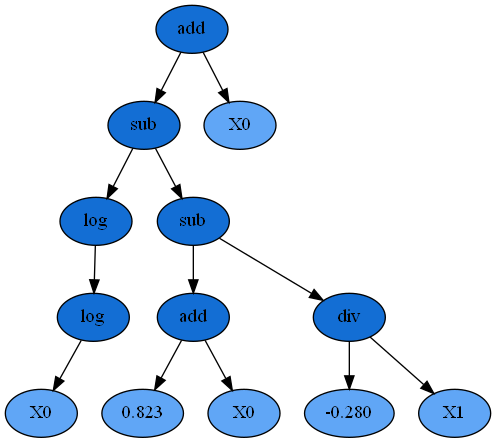

In [17]:
'''
GPLearn在默认情况下没有指数函数
这里实现了一个简化版本（正如Koza在论文中建议的那样）
在传递给regressorr的函数集中使用它。
'''
#命中直方图的统计以及绘制
#内省
def introspect(population):
    '''
    访问每一代的人口，并在每一代的人口计算后被调用
    每一代程序人口的填充数组包含具有以下的属性：
        raw_fitness_ : 程序个体的原始适应度
        fitness_ : 程序个体的适应度惩罚项
        oob_fitness_ : 袋外样本的原始适应度
        depth_ : 程序树的最大深度
        length_ : 程序中公式的数量
    '''
    #样本数量
    population_length = len(population)
    #样例长度
    sample_length = split_index
    #变异概率
    hit_value = 0.05
    #初始化填充为0
    prog_hits = np.zeros([population_length,sample_length])
    
    #进行遗传，变异，迭代
    for i in range(population_length):
        program = population[i]
        y_pred = program.y_predicted
        y = program.y_target
        mse = np.square(y-y_pred)
        err = y-y_pred
        errN = np.absolute(err) / y
        for j in range(sample_length):
            #判断是否选中
            is_hit = errN[j] <= hit_value
            prog_hits[i][j] =  1 if is_hit else 0 
    #统计数组中选中数
    hit_count = np.array([np.count_nonzero(prog) for prog in prog_hits])
    #display(hit_count)
    #将参数传递给直方图
    plt.hist(hit_count, bins='auto') 
    plt.title("命中次数以及个体数目的直方图")
    plt.xlabel('命中次数')
    plt.ylabel('个体数目')
    plt.show()

# 自定义特征生成模块
# 23.02585为对数减少几率，论文中所推荐
def clipped_exp(x):
  to_return = []
  for i in x:
    if i>=0:
      if i>=23.02585:
        to_return.append(10**10)
      else:
        to_return.append(np.exp(i))
    else:
      if i<=(-23.02585):
        to_return.append(10**(-10))
      else:
        to_return.append(np.exp(i))
  return np.array(to_return)
exp = gplearn.functions.make_function(clipped_exp, name='exp', arity=1)

'''
论文中采用的是平方差之和作为适应度，此处进行引用
使用平方和误差作为模型评价标准
'''
def ss(y, y_pred, sample_weights):
  return np.sum(np.square(y-y_pred))
sum_squared_errors = gplearn.fitness.make_fitness(ss, greater_is_better=False)

''' 
基于树形遗传规划的符号回归模型
注意关键参数包括最大样本数、节约系数和随机状态（至关重要）。
'''

# 出于比较的目的，这里只展示1代遗传后的结果
fitness_history = []

'''
population_size：种群规模
metric:字符串, 目标函数(损失函数) (默认值=‘MAE’(平均绝对误差))，此外还包括gplearn提供的mse等，也可以自定义。
generations:需要进化的代数
stopping_criteria：浮点数，停止条件
verbose = 1 ：为输出进度条记录
init_method：
    1）grow决策：公式树从根节点开始生长。在每一个子节点，gplearn会从所有常数、变量和函数中随机选取一个元素。
        如果它是常数或者变量，那么这个节点会停止生长，成为一个叶节点。如果它是函数，那么它的两个子节点将继续生长。
        用grow策略生长得到的公式树往往不对称，而且普遍会比用户设置的最大深度浅一些；在变量的数量远大于函数的数量时，这种情况更明显。
    2）full决策：除了最后一层外，其他所有层的所有节点都是内部节点——它们都只是随机选择的函数，而不是变量或者常数。
        最后一层的叶节点则是随机选择的变量和常数。用full策略得到的公式树必然是perfect binary tree。
    3）half and half决策：一半的公式树用grow策略生成，另一半用full策略生成。
        因为种群的多样性有利于生存，所以这是init_method参数的默认值。
function_set：字符串, 用于符号回归的函数，包括gplearn原始提供以及自定义
parsimony_coefficient：简约系数，浮点数或 “auto”, 可选 (默认值=0.001)用于惩罚过于复杂的公式。
    简约系数往往由实践验证决定。如果过于吝啬（简约系数太大），那么所有的公式树都会缩小到只剩一个变量或常数；
    如果过于慷慨（简约系数太小），公式树将严重膨胀。
    不过，gplearn已经提供了’auto’的选项，能自动控制节俭项的大小。
random_state：为了保证程序每次运行都分割一样的训练集和测试集。否则，同样的算法模型在不同的训练集和测试集上的效果不一样。
n_jobs：整数，可选(默认值=1)用于设置并行计算的操作
max_samples：浮点数, 可选 (默认值=1.0)从样本中抽取的用于评估每个树(成员)的百分比
'''

est_gp = SymbolicRegressor(population_size=500, metric=sum_squared_errors,
                           generations=1, stopping_criteria=0.01,
                           verbose=1, init_method = 'half and half', function_set= ('add', 'sub', 'mul', 'div', 'log', exp),
                           parsimony_coefficient=0.001, random_state=0, n_jobs=1, max_samples = 0.80, 
                           introspecting_function = introspect)
display(est_gp.fit(X_train, y_train))
fitness_history.append(est_gp._program.raw_fitness_)
print(est_gp._program)
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   1    14.33 4.532518604042587e+21        3 0.16837694800070338 0.16837694800070338      7.55s


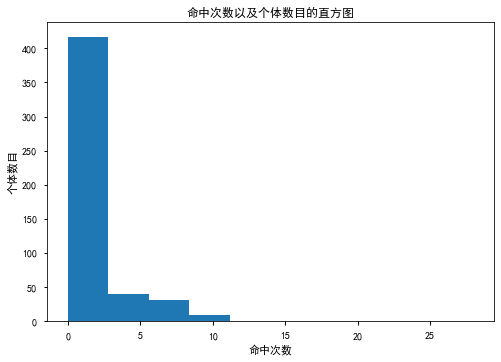

   2    14.83 1.8487067391742474e+24        3 0.16837694800070338 0.16837694800070338     11.32s


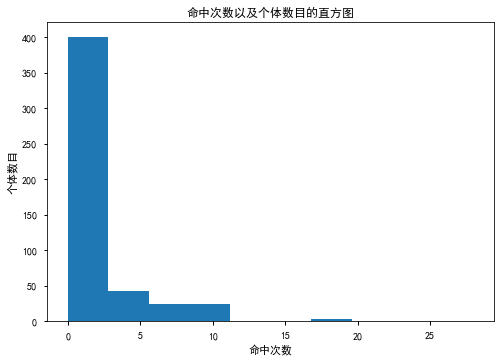

   3    14.89 9.862264376447002e+21        7 0.14225230703381012 0.14225230703381012     12.96s


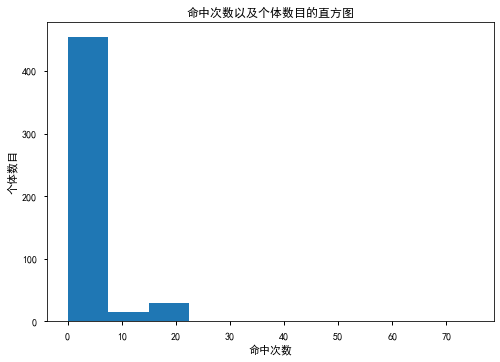

   4     7.86 6.33908864724493e+20       10 0.12712744177645102 0.12712744177645102     11.91s


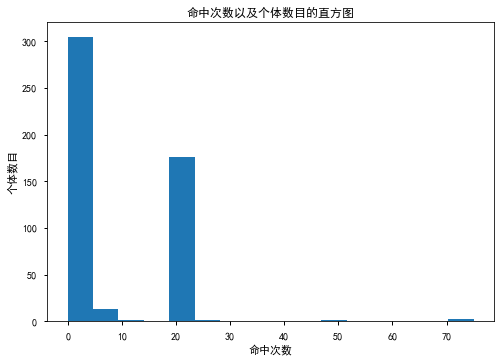

   5     4.37 311434.3981010104        7 0.11880605496179432 0.11880605496179432     10.65s


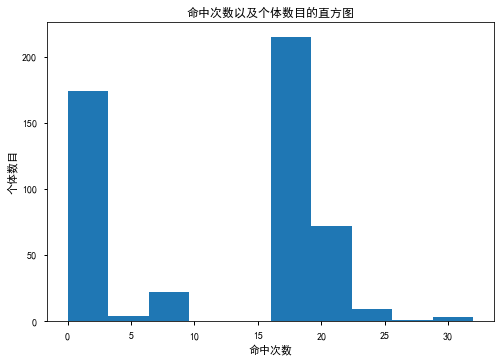

   6     7.25 2691255510242.9155       11 0.09142548554353196 0.09142548554353196      9.87s


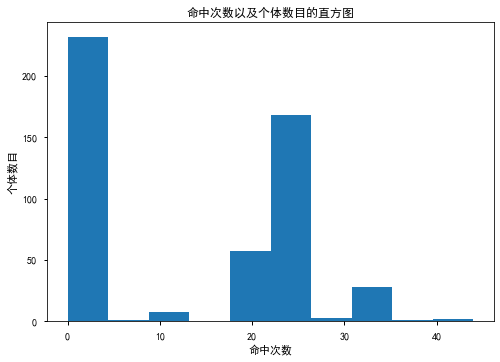

   7     7.76 277576.47867563367       13 0.07730944980147333 0.07730944980147333      9.03s


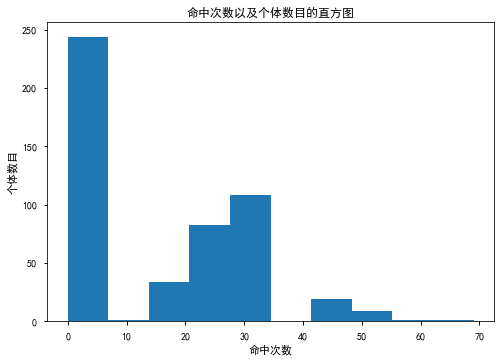

   8     10.6 181588.28032585763       17 0.06277259561769005 0.06277259561769005      8.24s


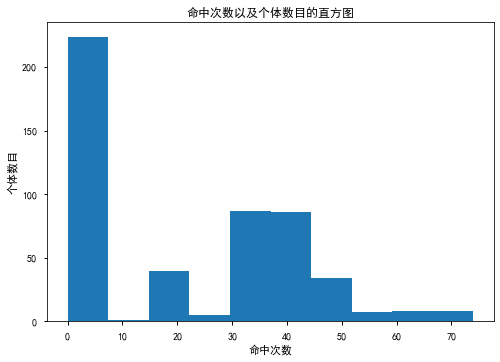

   9     12.5 17860323.009619836       19 0.0602453968164194 0.0602453968164194      7.41s


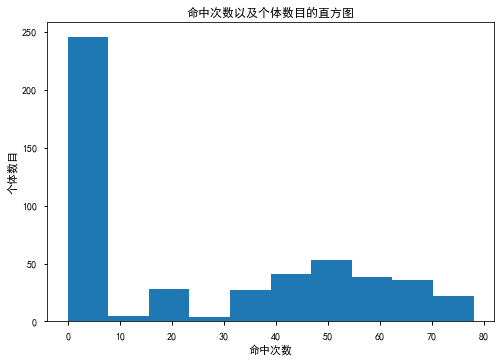

  10    15.54 134587.706484559       29 0.060145433691614875 0.060145433691614875      6.68s


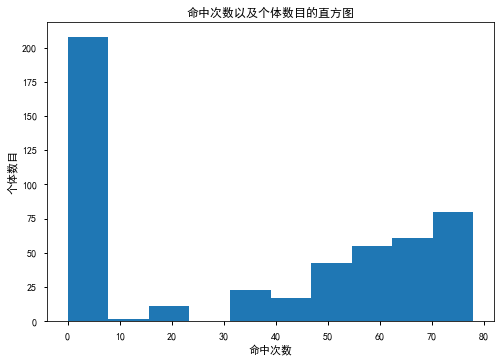

  11    14.66 1.7327163825924564e+23       27 0.060162358244940164 0.060162358244940164      5.94s


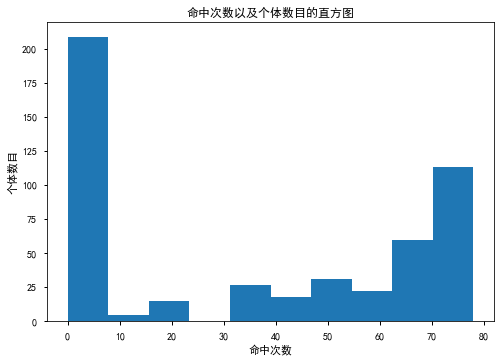

  12     13.9 196388.53527306134       13 0.06152624208228322 0.06152624208228322      5.20s


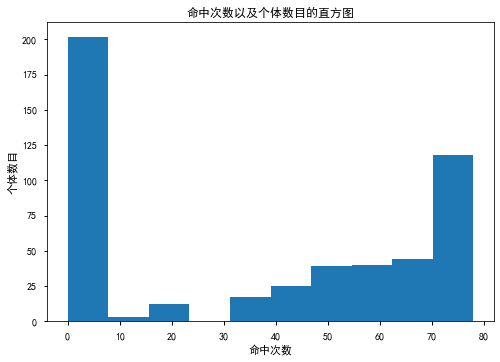

  13    13.65 158730.93175637524       13 0.06152624208228322 0.06152624208228322      4.47s


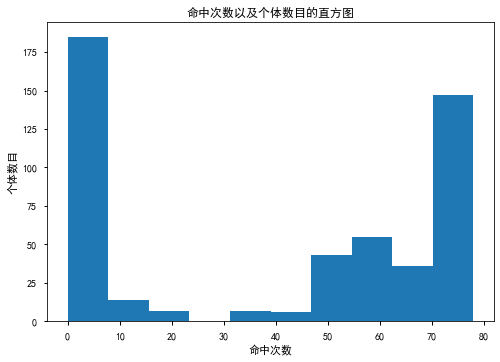

  14    13.62 175392.01953911947       15 0.06148980648059859 0.06148980648059859      3.74s


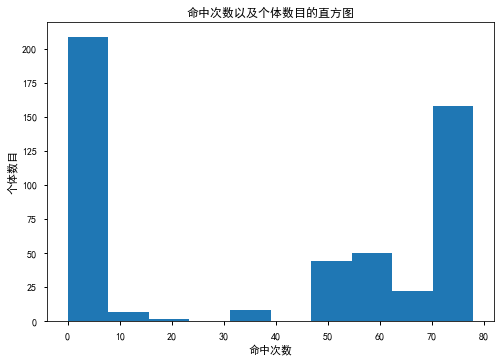

  15    12.99 171654.3801452741       11 0.06143024629715982 0.06143024629715982      3.00s


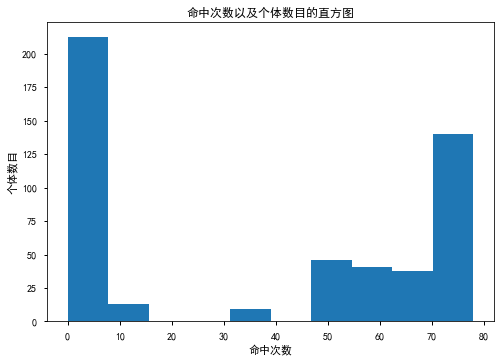

  16    12.43 161662.21265446197       11 0.06143024629715982 0.06143024629715982      2.25s


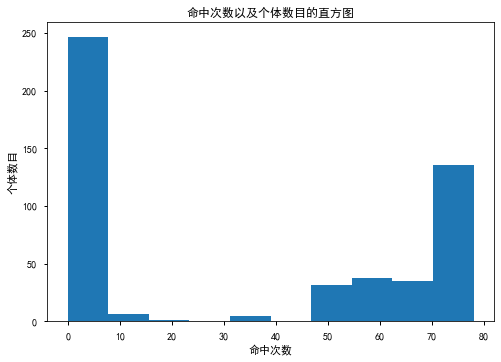

  17     11.6 156566.18270640392       11 0.06143024629715982 0.06143024629715982      1.51s


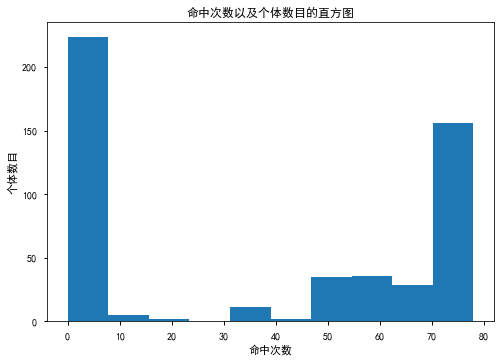

  18    11.33 184287.68115197742       11 0.06143024629715982 0.06143024629715982      0.75s


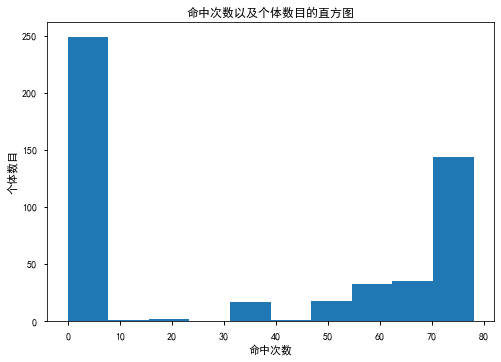

  19     11.1 150351.30881003637       11 0.06143024629715982 0.06143024629715982      0.00s


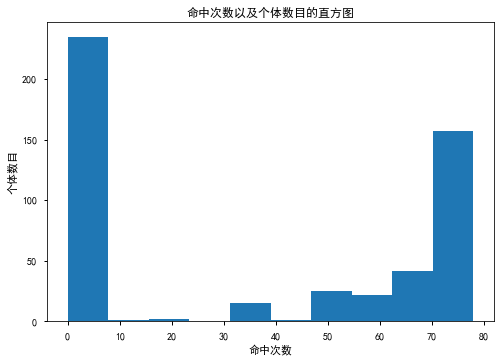

div(X1, add(0.990, add(0.990, add(0.990, add(0.990, X0)))))


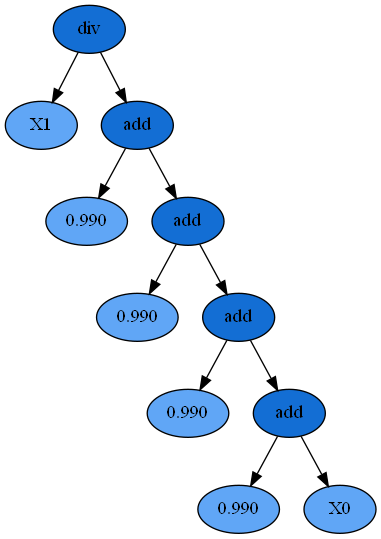

In [18]:
# 下面将给出后几代的情况以及最终的结果
#warm_start：布尔型, 可选 (默认值=False)用于选择是否使用之前的解决方案
est_gp.set_params(generations=20, warm_start=True)
est_gp.fit(X, y)
fitness_history.append(est_gp._program.raw_fitness_)
print(est_gp._program)
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())

In [19]:
# 对于回归问题score函数计算的是R^2分数，底层是r2_score
# 训练集和测试集的R^2值如下所示
print(est_gp.score(X, y))
print(est_gp.score(X_train, y_train))
print(est_gp.score(X_test, y_test))

0.9944722000599395
0.9891641668144544
0.9295859013899936


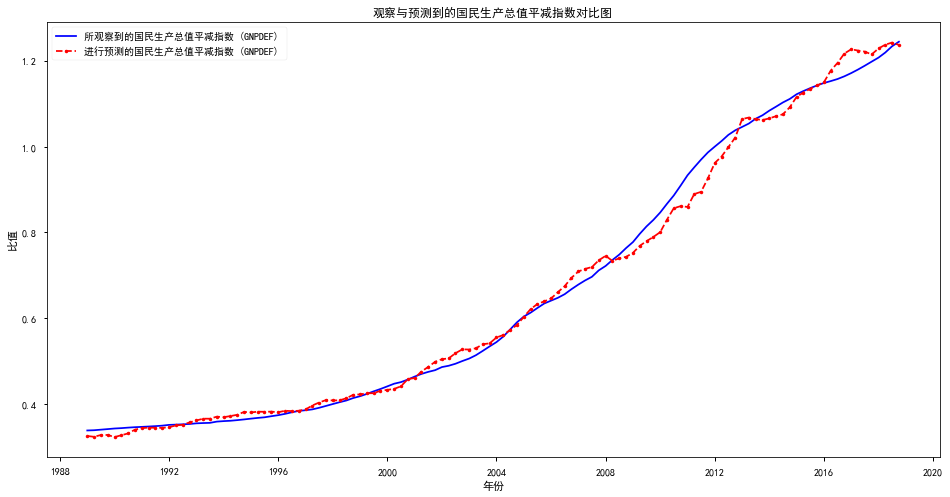

In [20]:
plt.figure(figsize=(16, 8))

#图表的相关性说明
plt.title('观察与预测到的国民生产总值平减指数对比图')
plt.xlabel('年份')
plt.ylabel('比值')

#根据公式树进行预测，X1为M2，X0为GNP
plt.plot(df_GNPDEF.index, df_GNPDEF.VAL, 'b-', label = '所观察到的国民生产总值平减指数 (GNPDEF) ')
plt.plot(df_GNPDEF.index, df_M2.VAL/(df_GNP.VAL+(0.99*4)), 'r--', label = '进行预测的国民生产总值平减指数 (GNPDEF) ', marker = '.')
plt.legend()
